# Centrality in networks
Centrality measures calculate the importance of a node (or group of nodes) within a network.

## Setup
First we import some libraries and define useful auxiliary functions

In [1]:
import sys
import os

import networkx as nx
import seaborn as sns
import collections

In [2]:
module_path = os.path.abspath(os.path.join('../../src'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from graphutil.visualization import draw_graph_with_centralities

In [4]:
def plot_histogram(values):
    counter = collections.Counter(values)
    keys = [round(k,3) for k in counter.keys()]
    sns.barplot(x=keys, y=list(counter.values()), palette="pastel")

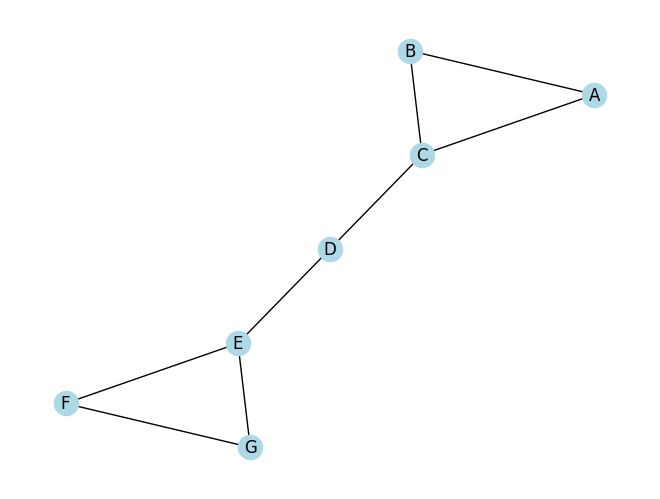

In [5]:
G = nx.Graph()
G.add_nodes_from(['A', 'B', 'C', 'D', 'E', 'F', 'G'])
G.add_edges_from([('A', 'B'), ('A', 'C'), 
                  ('B', 'C'), 
                  ('C', 'D'), 
                  ('D', 'E'), 
                  ('E', 'F'), ('E', 'G'), 
                  ('F', 'G')
                 ])
nx.draw_kamada_kawai(G, with_labels=True, node_color="lightblue")

## Degree Centrality

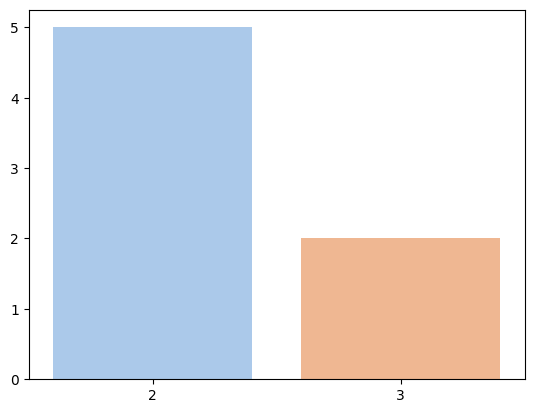

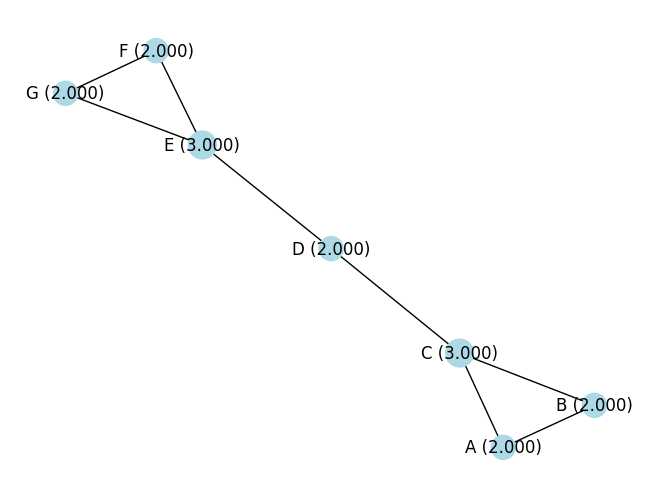

In [6]:
degrees = nx.degree(G)
vals = [val for node, val in degrees]
plot_histogram(vals)
degree_map = {k:v for (k, v) in list(degrees)}
draw_graph_with_centralities(G, degree_map)

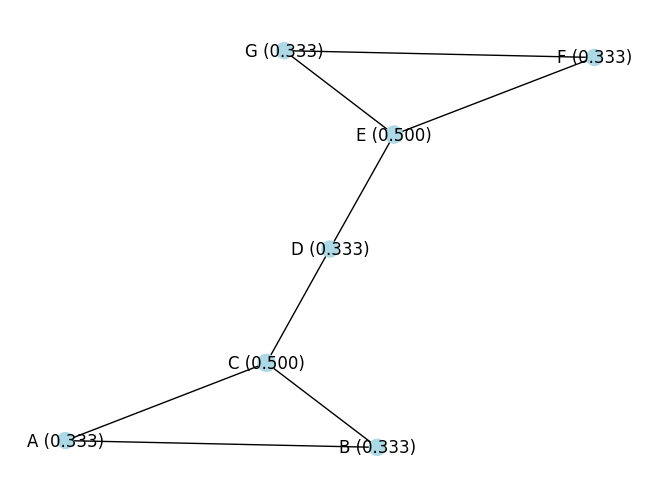

In [7]:
# With normalization
dc = nx.degree_centrality(G)
draw_graph_with_centralities(G, dc)

## Closeness Centrality

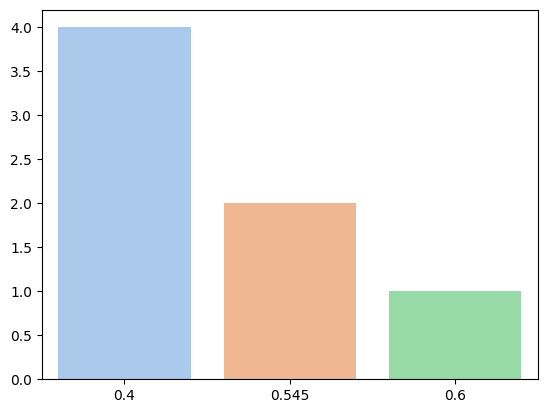

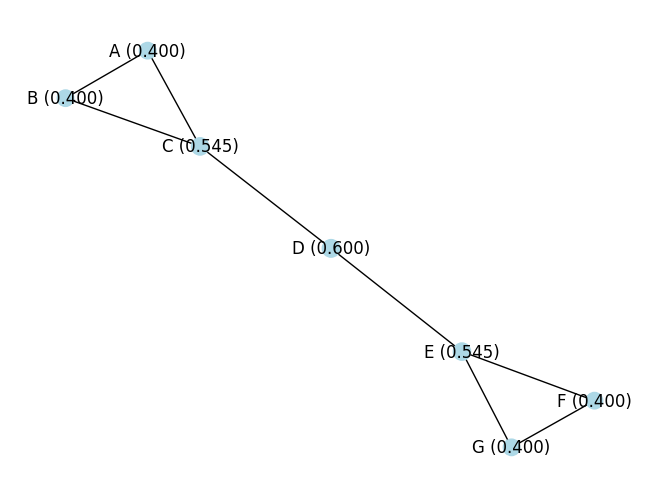

In [8]:
cc = nx.closeness_centrality(G)
plot_histogram(cc.values())
draw_graph_with_centralities(G, cc)

## Betweenness Centrality

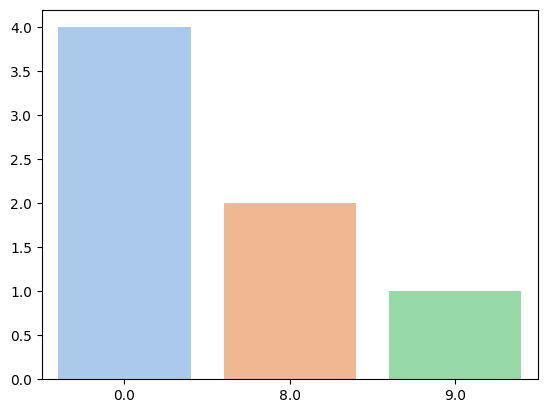

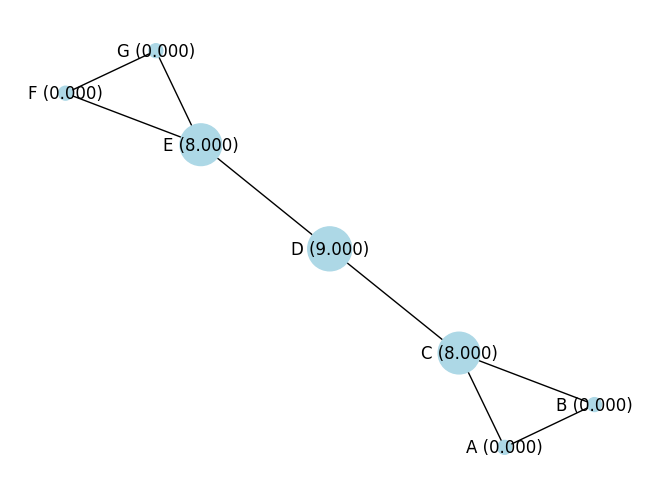

In [9]:
bc = nx.betweenness_centrality(G, normalized=False)
plot_histogram(bc.values())
draw_graph_with_centralities(G, bc)

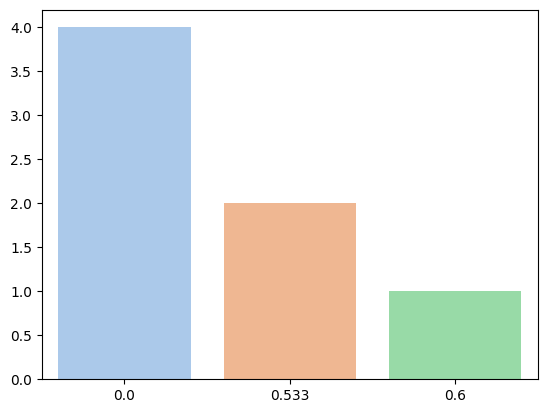

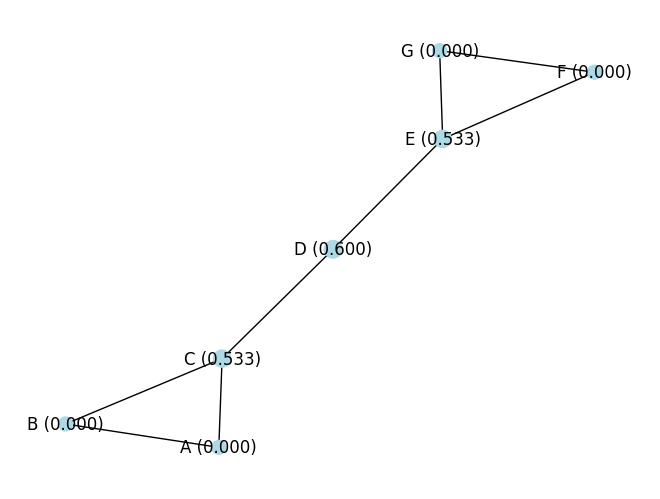

In [10]:
bc = nx.betweenness_centrality(G, normalized=True)
plot_histogram(bc.values())
draw_graph_with_centralities(G, bc)

In [11]:
start = {'A': 100, 'B': 1, 'C': 100, 'D': 1, 'E': 1, 'F': 1, 'G': 1}
start

{'A': 100, 'B': 1, 'C': 100, 'D': 1, 'E': 1, 'F': 1, 'G': 1}

In [12]:
nstart_sum = sum(start.values())
start_n = {k: v / nstart_sum for k, v in start.items()}
start_n

{'A': 0.4878048780487805,
 'B': 0.004878048780487805,
 'C': 0.4878048780487805,
 'D': 0.004878048780487805,
 'E': 0.004878048780487805,
 'F': 0.004878048780487805,
 'G': 0.004878048780487805}

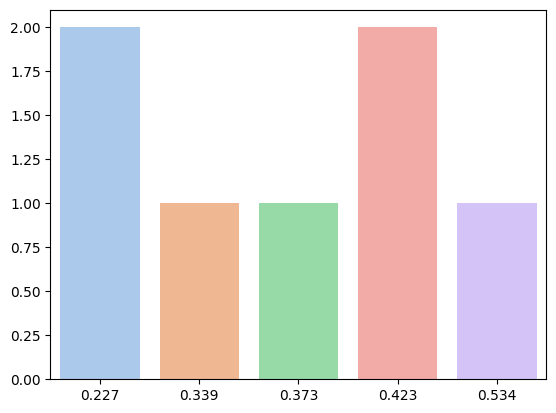

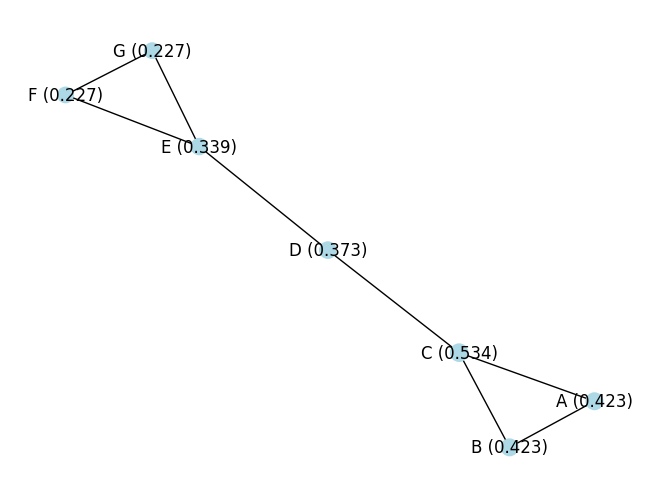

In [13]:
ev = nx.eigenvector_centrality(G, nstart=start, max_iter=20, tol=0.01)
plot_histogram(ev.values())
draw_graph_with_centralities(G, ev)

### Calculation of eigenvector centrality
In Eigenvector centrality a node's importance increases if that node has important neighbours

This section shows a simple calculation of the eigenvector centrality.
We use the sample graph from: http://djjr-courses.wikidot.com/soc180:eigenvector-centrality

![alt text](images/2.png "Base Graph")

![alt text](images/3.png "Base Graph")

![alt text](images/4.png "Base Graph")

In the following example we use the same graph but normalize the vector

In [14]:
import numpy as np

In [15]:
def vector_difference(x, y):
    return sum(np.absolute(np.array(x) - np.array(y)))

def normalize_vector(vector):
    return vector / np.sqrt(np.sum(vector**2))

def next_eigenvector_multiplication(a, vector):
    vector_n = normalize_vector(vector) # If already formalized the values remain unchanged
    updated_vector_as_matrix = a.dot(vector_n)
    updated_vector = np.array(updated_vector_as_matrix).flatten()
    return normalize_vector(updated_vector)

In [16]:
A = np.matrix([[0, 1, 1, 1, 0],
               [1, 0, 1, 0, 0],
               [1, 1, 0, 1, 0],
               [1, 0, 1, 0, 1],
               [0, 0, 0, 1, 0]
              ])
v = np.array([3, 2, 3, 3, 1])
mult = np.dot(A, v)

current_vector = normalize_vector(v)

print(f"Initial vector:\t{current_vector}")
for i in range(20):
    next_vector = next_eigenvector_multiplication(A, current_vector)
    print(f"{i}: Vector differences: {vector_difference(current_vector, next_vector)}.\tNext vector is: {next_vector}")
    current_vector = next_vector

Initial vector:	[0.53033009 0.35355339 0.53033009 0.53033009 0.1767767 ]
0: Vector differences: 0.14742072760542255.	Next vector is: [0.53692484 0.40269363 0.53692484 0.46980924 0.20134682]
1: Vector differences: 0.04686363568567012.	Next vector is: [0.533745   0.40666285 0.533745   0.48291214 0.177915  ]
2: Vector differences: 0.029105825873123492.	Next vector is: [0.53891015 0.40418261 0.53891015 0.47154638 0.18284452]
3: Vector differences: 0.020573625839195836.	Next vector is: [0.53561243 0.40808566 0.53561243 0.47731448 0.17853748]
4: Vector differences: 0.013633205080750804.	Next vector is: [0.53802265 0.40558631 0.53802265 0.47318403 0.18072043]
5: Vector differences: 0.009236635273823651.	Next vector is: [0.53642387 0.40741054 0.53642387 0.47583461 0.17915617]
6: Vector differences: 0.006194606877172798.	Next vector is: [0.53751227 0.40619949 0.53751227 0.47403124 0.18015956]
7: Vector differences: 0.004169651920522849.	Next vector is: [0.53678282 0.40702349 0.53678282 0.475235

## Group Degree

Group Degree of Node D and E: 0.6
Group Degree of Node C and E: 1.0


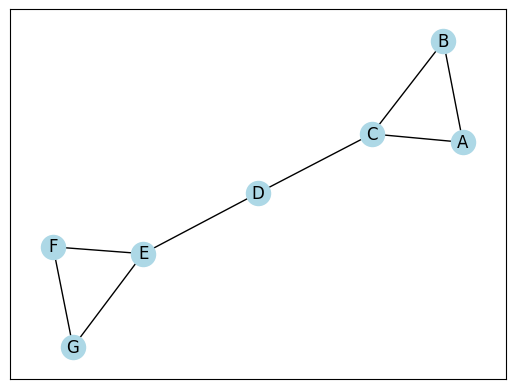

In [17]:
nx.draw_networkx(G, node_color="lightblue")
print(f"Group Degree of Node D and E: {nx.group_degree_centrality(G, {'D', 'E'})}")
print(f"Group Degree of Node C and E: {nx.group_degree_centrality(G, {'C', 'E'})}")

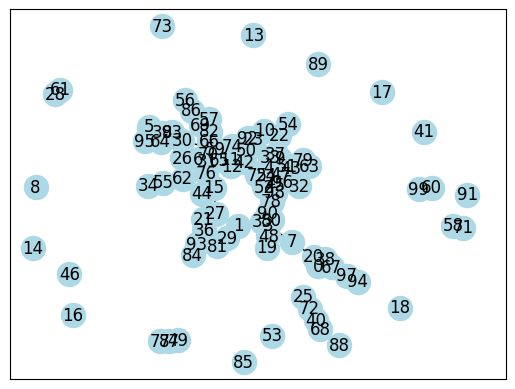

In [18]:
# Greedy attempt to find most influential group of nodes
G_er = nx.erdos_renyi_graph(100, 0.02, seed=42)
#G_er = nx.karate_club_graph()
nx.draw_networkx(G_er, node_color="lightblue")

In [19]:
print(nx.group_degree_centrality(G_er, {65, 24, 96}))

0.17525773195876287


## Group Betweenness

Group Betweenness of Node C and E: 0.8


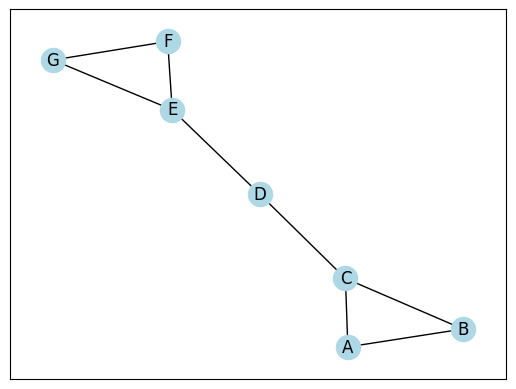

In [20]:
nx.draw_networkx(G, node_color="lightblue")
print(f"Group Betweenness of Node C and E: {nx.group_betweenness_centrality(G, {'C', 'E'})}")

## Group Closeness

Group Betweenness of Node C and D: 0.7142857142857143
Group Betweenness of Node C and E: 1.0


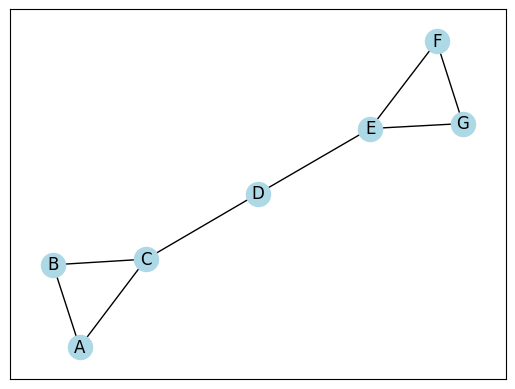

In [21]:
nx.draw_networkx(G, node_color="lightblue")
print(f"Group Betweenness of Node C and D: {nx.group_closeness_centrality(G, {'C', 'D'})}")
print(f"Group Betweenness of Node C and E: {nx.group_closeness_centrality(G, {'C', 'E'})}")